#### Intro to Decision Trees --

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = load_breast_cancer()
dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
print(dataset.columns)
print(dataset.info())

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimete

In [3]:
from sklearn.model_selection import train_test_split
X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print("X train shape:",X_train.shape,"Y Train shape:",y_train.shape,"X Test shape:",X_test.shape,"Y test shape:",y_test.shape)

X train shape: (381, 30) Y Train shape: (381,) X Test shape: (188, 30) Y test shape: (188,)


In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(ccp_alpha=0.01)
clf = clf.fit(X_train, y_train)

In [5]:
clf.get_params()

{'ccp_alpha': 0.01,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [6]:
predictions = clf.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [7]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [1.        , 0.        ],
       [0.03056769, 0.96943231],
       [1.        , 0.        ],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.03056769, 0.96943231],
       [1.        , 0.        ],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [1.        , 0.        ],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.03056769, 0.96943231],
       [0.        , 1.        ],
       [0.03056769, 0.96943231],
       [1.

In [9]:
from sklearn.metrics import accuracy_score
print("Accuracy score is", round(100*accuracy_score(y_test, predictions),2),"%")

Accuracy score is 89.89 %


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[ 65,   6],
       [ 13, 104]], dtype=int64)

In [11]:
from sklearn.metrics import precision_score
print("Precision score is", round(100*precision_score(y_test, predictions),2),"%")

Precision score is 94.55 %


In [12]:
from sklearn.metrics import recall_score
print("Recall score is", round(100*recall_score(y_test, predictions),2),"%")

Recall score is 88.89 %


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.83      0.92      0.87        71
      benign       0.95      0.89      0.92       117

    accuracy                           0.90       188
   macro avg       0.89      0.90      0.89       188
weighted avg       0.90      0.90      0.90       188



In [15]:
feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [16]:
clf.feature_importances_

array([0.        , 0.03798048, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.07234597, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.83054819, 0.        , 0.        ,
       0.        , 0.        , 0.05912536, 0.        , 0.        ])

In [17]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
worst concave points,0.837022
worst area,0.136156
worst radius,0.026821
mean radius,0.000000
mean texture,0.000000
worst symmetry,0.000000
worst concavity,0.000000
worst compactness,0.000000
worst smoothness,0.000000
worst perimeter,0.000000


In [18]:
## Filtering by features which have importance value greater than 0
features = list(feature_importance[feature_importance[0]>0].index)
features

['worst concave points', 'worst area', 'worst radius']

<Axes: >

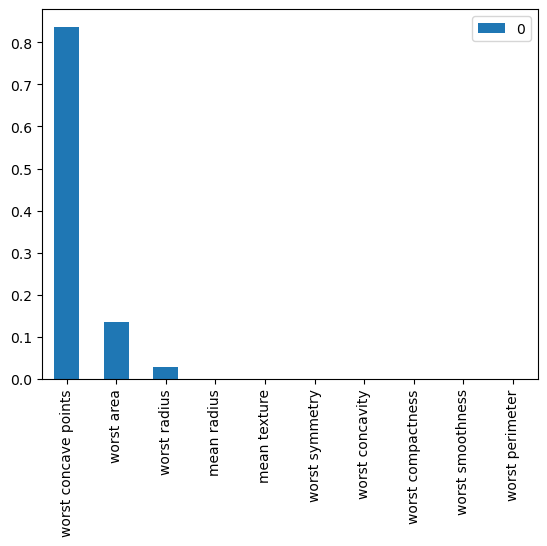

In [19]:
feature_importance.head(10).plot(kind='bar')